In [114]:
import pandas as pd

In [115]:
df = pd.read_csv('TotalDeaths.csv')
df.head()

,Notes,Year,Year Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population
0,NaN,1999.0,1999.0,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,163,23878
1,NaN,1999.0,1999.0,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,333,78302
2,NaN,1999.0,1999.0,< 1 year,1,Female,F,Black or African American,2054-5,3925,297942
3,NaN,1999.0,1999.0,< 1 year,1,Female,F,White,2106-3,7870,1452001
4,Total,1999.0,1999.0,< 1 year,1,Female,F,NaN,NaN,12291,1852123


In [116]:
df.shape

(2507, 11)

In [117]:
df = df[df.Deaths != 'Not Applicable']
df = df[df.Population != 'Not Applicable']
df = df[df.Deaths != 'Unreliable']
df = df[df.Population != 'Unreliable']
df = df.drop(['Year Code', 'Ten-Year Age Groups Code', 'Gender Code', 'Race Code'], axis = 1)

In [118]:
df.Deaths = df.Deaths.astype('float')
df.Population = df.Population.astype('float')
percentageDeaths = df.Deaths/df.Population
df['Percentage(Race,Gender,Age)'] = percentageDeaths*100

In [119]:
totals = df[df.Notes == 'Total'].drop(['Race'],axis = 1).dropna().drop(['Notes'], axis = 1)

In [120]:
df = df[df.Notes != 'Total']
df = df.drop(['Notes'], axis = 1)

In [121]:
totals
totals.drop('Percentage(Race,Gender,Age)')

KeyError: "['Percentage(Race,Gender,Age)'] not found in axis"

In [99]:
df

,Year,Ten-Year Age Groups,Gender,Race,Deaths,Population,Percentage
0,1999.0,< 1 year,Female,American Indian or Alaska Native,163.0,23878.0,0.682637
1,1999.0,< 1 year,Female,Asian or Pacific Islander,333.0,78302.0,0.425276
2,1999.0,< 1 year,Female,Black or African American,3925.0,297942.0,1.317370
3,1999.0,< 1 year,Female,White,7870.0,1452001.0,0.542011
5,1999.0,< 1 year,Male,American Indian or Alaska Native,180.0,24937.0,0.721819
...,...,...,...,...,...,...,...
2490,2017.0,85+ years,Female,White,486909.0,3637636.0,13.385314
2492,2017.0,85+ years,Male,American Indian or Alaska Native,1003.0,12970.0,7.733231
2493,2017.0,85+ years,Male,Asian or Pacific Islander,9252.0,100678.0,9.189694
2494,2017.0,85+ years,Male,Black or African American,19749.0,153683.0,12.850478


In [100]:
df17 = df[df.Year == 2017]
df17Babies = df17[df17['Ten-Year Age Groups'] == '< 1 year']
df17Old = df17[df17['Ten-Year Age Groups'] == '85+ years']

In [101]:
df17Babies

,Year,Ten-Year Age Groups,Gender,Race,Deaths,Population,Percentage
2377,2017.0,< 1 year,Female,American Indian or Alaska Native,150.0,37522.0,0.399765
2378,2017.0,< 1 year,Female,Asian or Pacific Islander,466.0,119599.0,0.389635
2379,2017.0,< 1 year,Female,Black or African American,3128.0,330757.0,0.945709
2380,2017.0,< 1 year,Female,White,6123.0,1436267.0,0.426313
2382,2017.0,< 1 year,Male,American Indian or Alaska Native,186.0,38829.0,0.479023
2383,2017.0,< 1 year,Male,Asian or Pacific Islander,567.0,125811.0,0.450676
2384,2017.0,< 1 year,Male,Black or African American,3971.0,345325.0,1.149931
2385,2017.0,< 1 year,Male,White,7744.0,1505185.0,0.514488


In [102]:
# df17Babies.groupby('Race').plot(x = 'Gender', y = 'Percentage', kind = 'bar', color = ['plum','lightskyblue'], subplots = True)

In [113]:
df17.groupby(['Race','Gender']).sum().plot(kind='bar', y = 'Percentage(Race,Gender,Age)', color = ['plum','lightskyblue'], title = 'Deaths in 2017')

KeyError: 'Percentage(Race,Gender,Age)'

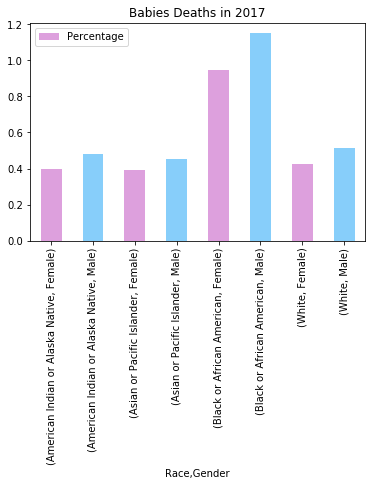

In [104]:
df17Babies.groupby(['Race','Gender']).sum().plot(kind='bar', y = 'Percentage', color = ['plum','lightskyblue'], title = 'Babies Deaths in 2017')

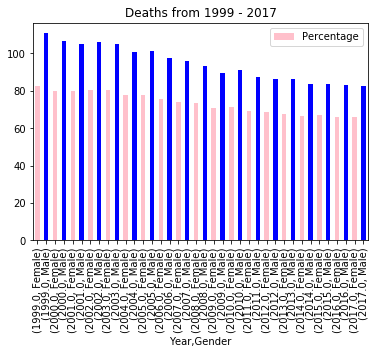

In [112]:
df.groupby(['Year','Gender']).sum().plot(kind='bar', y = 'Percentage', color = ['pink','blue'], title = 'Deaths from 1999 - 2017')